In [1]:
def med_geoP(arr,N):
    prod=1
    for i in arr:
        prod=prod*i
    #Newton raphson
    #f(y)=y^N-x
    x0=1
    xc=1
    while True:
        fx = x0**N - prod
        dfx= N*(x0**(N-1))
        x1 = x0-fx/dfx
        xc=x0
        x0=x1
        if(abs(x1-xc)<0.01):
            break
    

In [2]:
%%file med_geoC.c
#include <stdio.h>
#include <math.h>
float med_geoC(float *arr, long int N){
    float prod,mg;
    prod=1.0;
    for(int i;i<N;i++){
        prod=prod*arr[i];
    }
    float x0=1,xc=1;
    while(1){
        float fx,dfx;
        fx = pow(x0,N) - prod;
        dfx= N*pow(x0,N-1);
        mg = x0 - fx/dfx;
        xc=x0;
        x0=mg;
        if(fabs(mg-xc)<0.01){
            break;
        }
    }   
    return mg;
}

Overwriting med_geoC.c


In [3]:
! gcc -c med_geoC.c -o med_geoC.o -lm


In [4]:
! gcc -shared med_geoC.o -o med_geoC.so

In [5]:
import ctypes
import numpy as np

def ctypes_med_geoC():
    lib=ctypes.CDLL('./med_geoC.so')
    
    lib.med_geoC.argtypes = [
        np.ctypeslib.ndpointer(dtype=np.float32),
        ctypes.c_long
    ]
    lib.med_geoC.restype = ctypes.c_float
    
    return lib.med_geoC

In [6]:
med_geoC = ctypes_med_geoC()

In [ ]:
import math
N = 64

v = np.random.random(size = (N)).astype(np.float32)
med_geoP(v,N)
prod=1
for i in v:
    prod=prod*i
mg=math.pow(prod,1/N)
print(mg)


In [16]:
import time
import statistics
lstMP = []
lstMC =[]
lstP = []
lstC = []
arrN = [16,32,128,256,512,1024,2048,4096,8192]

iter = 50
for N in arrN:
    arr = np.random.random(size = (N)).astype(np.float32)
    for i in range(iter):
        tic1 = time.perf_counter()
        med_geoP(arr,N)
        toc1 = time.perf_counter()
        lstP.append(toc1-tic1)
            
        tic2 = time.perf_counter()
        med_geoC(arr,N)
        toc2 = time.perf_counter()
        lstC.append(toc2-tic2)
    medianaP = statistics.median(lstP)
    medianaC = statistics.median(lstC)
    lstMP.append(medianaP)
    lstMC.append(medianaC)
print(lstMP)
print(lstMC)


[6.875800318084657e-05, 8.602499656262808e-05, 7.90424965089187e-05, 9.402549403603189e-05, 0.0001118635045713745, 0.00014354350059875287, 0.00017052800103556365, 0.0002786545010167174, 0.0003109555000264663]
[3.837650365312584e-05, 3.8541500543942675e-05, 2.8006998036289588e-05, 2.968050102936104e-05, 3.054199987673201e-05, 3.5110504541080445e-05, 3.7063997297082096e-05, 3.849649874609895e-05, 4.0590501157566905e-05]


<function matplotlib.pyplot.show(close=None, block=None)>

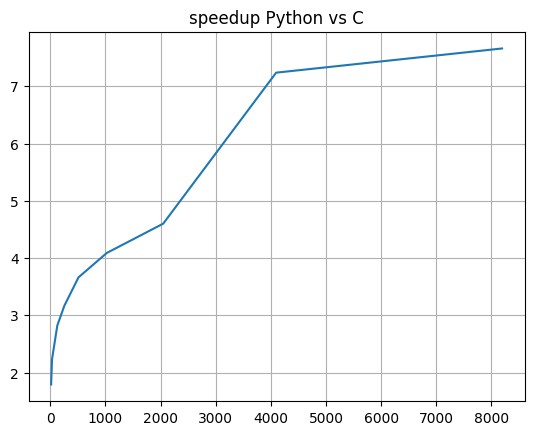

In [17]:
import matplotlib.pyplot as plt
speedup = np.asarray(lstMP)/np.asarray(lstMC)
plt.plot(arrN, speedup)
plt.grid()
plt.title('speedup Python vs C')
plt.tight_layout
plt.show